# 빅데이터프로그래밍
       
13주 1강: Word Embedding
<br/><br/>

숭실대학교<br/>
AI융합학부<br/>
윤진혁<br/>

# Today
- 확률론적 언어 모형에 대해서 배워봅시다.
- NLP에서 자주 사용되는 Word2Vec에 대해서 배워봅시다.
- Word2Vec에 자주 사용되는 Gensim 라이브러리를 사용해 봅시다.



- Disclaimer: https://datascienceschool.net/ 과 PyTorch로 시작하는 딥 러닝 입문 두 가지를 참조했습니다.

# 확률론적 언어 모형

확률론적 언어 모형(Probabilistic Language Model)은 단어의 열이 주어졌을 때, 이 단어의 묶음이 실제 문장으로 성립될 확률을 계산해서 실제로 현실에서 사용 가능한 문장인지 판별하는 모형입입니다. $m$개의 단어 $w_1, w_2, \ldots, w_m$ 가 주어진다면, 그 확률을 $P(w_1, w_2, \ldots, w_m)$ 형태로 실제 존재 가능한지 확인하는 것이지요.


이 확률은 각 단어의 확률과 단어들의 조건부 확률을 이용하여 다음과 같이 계산할 수 있습니다.

$$
\begin{eqnarray}
P(w_1, w_2, \ldots, w_m) &=& P(w_1, w_2, \ldots, w_{m-1}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1, w_2, \ldots, w_{m-2}) \cdot P(w_{m-1}\;|\; w_1, w_2, \ldots, w_{m-2}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1) \cdot P(w_2 \;|\; w_1) \cdot  P(w_3 \;|\; w_1, w_2) P(w_4 \;|\; w_1, w_2, w_3) \cdots P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})
\end{eqnarray}
$$

여기에서 $P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})$ 은 지금까지 $w_1, w_2, \ldots, w_{m-1}$라는 단어 열이 나왔을 때, 그 다음 단어로 $w_m$이 나올 조건부 확률을 말하며 이것을 **문맥(context)** 정보라고 합니다.

이 때 조건부 확률을 어떻게 모형화하는냐에 따라 

* 유니그램 모형(Unigram Model)
* 바이그램 모형(Bigram Model)
* N그램 모형(N-gram Model)

등으로 나뉘어 집니다.

### 유니그램 (1 gram) 모형

만약 모든 단어의 활용이 완전히 서로 독립이라면 단어 열의 확률은 다음과 같이 각 단어의 확률의 곱이 됩니다. 이러한 모형을 유니그램 모형이라고 합니다.

$$ P(w_1, w_2, \ldots, w_m) = \prod_{i=1}^m P(w_i) $$

### 바이그램 (2 gram) 모형

만약 단어의 활용이 바로 전 단어에만 의존한다면 단어 열의 확률은 다음과 같습니다. 이러한 모형을 바이그램 모형 또는 마코프 모형(Markov Model)이라고 합니다. Markov Process는 Memory가 없고, 지금의 상태가 바로 직전의 상태에만 영향을 주는 확률 과정을 Markov 과정이라고 부릅니다. 다양한 문제에서 사용되니 Markov Process가 무엇인지 기억해 두시면 좋습니다.

$$ P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=2}^{m} P(w_{i}\;|\; w_{i-1}) $$

### N그램 모형

만약 단어의 활용이 바로 전 $n-1$개의 단어에만 의존한다면 단어 열의 확률은 다음과 같습니다. 이러한 모형을 N그램 모형이라고 합니다.

$$ P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=n}^{m} P(w_{i}\;|\; w_{i-1}, \ldots, w_{i-n}) $$

## NLTK의 N그램 기능

NLTK 패키지에는 바이그램과 N-그램을 생성하는 `bigrams`, `ngrams` 명령이 있습니다.

In [40]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

sentence = "I am a boy."
tokens = word_tokenize(sentence)

bigram = bigrams(tokens)
trigram = ngrams(tokens, 3)

print("\nbigram:")
for t in bigram:
    print(t)

print("\ntrigram:")
for t in trigram:
    print(t)


bigram:
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram:
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


조건부 확률을 추정할 때는 문장의 시작과 끝이라는 조건을 표시하기 위해 모든 문장에 문장의 시작과 끝을 나타내는 특별 토큰을 추가합니다. 예를 들어 문장의 시작은 `SS`, 문장의 끝은 `SE` 이라는 토큰을 사용할 수 있습니다. 대부분의 자연어 처리에서 이런 류의 special token을 자주 사용합니다.

예를 들어 ["I", "am", "a", "boy", "."]라는 토큰열(문장)은 ["SS", "I", "am", "a", "boy", ".", "SE"]라는 토큰열이 됩니다.
ngrams 명령은 padding 기능을 사용하여 이런 특별 토큰을 추가할 수 있습니다.

In [43]:
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
for t in bigram:
    print(t)

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


## 조건부 확률 추정 방법

NLTK패키지를 사용하면 바이그램 형태의 조건부 확률을 쉽게 추정할 수 있습니다. 우선 `ConditionalFreqDist` 클래스로 각 문맥별 단어 빈도를 측정한 후에 `ConditionalProbDist` 클래스를 사용하면 조건부 확률을 추정할 수 있습니다.

In [44]:
from nltk import ConditionalFreqDist

sentence = "I am a boy."
tokens = word_tokenize(sentence)
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])

`ConditionalFreqDist` 클래스는 문맥을 조건으로 가지는 dict와 유사합니다.

In [45]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [46]:
cfd["SS"]

FreqDist({'I': 1})

nltk 패키지의 샘플 코퍼스인 movie_reviews의 텍스트로부터 바이그램 확률을 추정해 봅시다.

In [49]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews

sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

sentences[:5]

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\jhyun\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhyun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples')]

문장의 처음(SS 문맥), i라는 단어 다음, 마침표 다음에 나오는 단어의 빈도는 다음과 같습니다.

In [50]:
cfd = ConditionalFreqDist(sentences)

* 문장의 처음에 올 수 있는 단어들

In [51]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

* i 다음에 올 수 있는 단어들

In [52]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

* 마침표 다음에 올 수 있는 단어들

In [53]:
cfd["."].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

그림으로 그리면 다음과 같습니다.

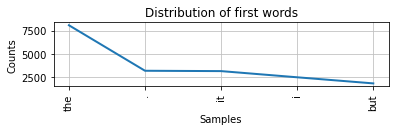

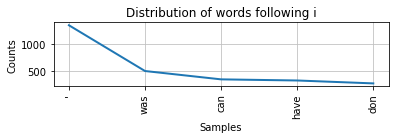

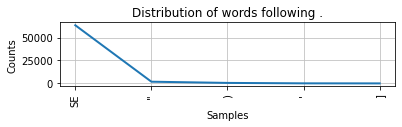

<Figure size 432x288 with 0 Axes>

In [54]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.subplot(311)
cfd["SS"].plot(5, title="Distribution of first words")
plt.subplot(312)
cfd["i"].plot(5, title="Distribution of words following i")
plt.subplot(313)
cfd["."].plot(5, title="Distribution of words following .")
plt.tight_layout();

빈도를 추정하면 각각의 조건부 확률은 기본적으로 다음과 같이 추정할 수 있습니다.

$$ P(w\;|\; w_c) = \dfrac{C((w_c, w))}{C((w_c))} $$

위 식에서 $C(w_c, w)$은 전체 말뭉치에서 $(w_c, w)$라는 바이그램이 나타나는 횟수이고 $C(w_c)$은 전체 말뭉치에서 $(w_c)$라는 유니그램(단어)이 나타나는 횟수입니다.

NLTK의 `ConditionalProbDist` 클래스에 `MLEProbDist` 클래스 팩토리를 인수로 넣어 위와 같이 빈도를 추정할 수 있습니다.

In [55]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

트레이닝이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있습니다.

In [56]:
cpd["i"].prob("am")

0.018562267971650354

In [57]:
cpd["i"].prob("is")

0.0002249971875351558

In [58]:
cpd["we"].prob("are")

0.08504504504504505

In [59]:
cpd["we"].prob("is")

0.0

## 바이그램 언어 모형

이제 조건부 확률을 알게 되었으니 각 문장의 확률을 구해봅시다. 

바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타납니다

$$ P(\text{SS I am a boy SE}) = P(\text{I}\;|\; \text{SS}) \cdot P(\text{am}\;|\; \text{I}) \cdot P(\text{a}\;|\; \text{am}) \cdot P(\text{boy}\;|\; \text{a}) \cdot P(.\;|\; \text{boy}) \cdot P(\text{SE}\;|\; .) $$



우선 다음과 같이 문장(단어 리스트)의 리스트를 만듭니다.

In [60]:
import numpy as np
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [61]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [62]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

### 문장의 생성

이 모형을 기반으로 임의의 랜덤한 문장을 생성할 수 있습니다. 

In [63]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [67]:
generate_sentence(3)

'The bugs, by depicting the movie even an excellent australian director asks.'

## 확률론적 언어 모형의 활용

확률론적 언어 모형은 다음과 같은 분야에 광범위하게 활용할 수 있습니다.

* 철자 및 문법 교정(Spell Correction)
* 음성 인식(Speech Recognition)
* 자동 번역(Machine Translation)
* 자동 요약(Summarization)
* 챗봇(Question-Answering)

사실 요즘은 더 좋은 언어 모델이 많지요. 자주 익숙한 GPT, BERT 같은 모델을 더 많이 씁니다. 하지만 이런 단순한 모형을 알아 두는 것도 중요합니다.

## 확률론적 언어 모형의 한계점

언어 모델은 실생활에서 사용되는 언어의 확률 분포를 근사 모델링 합니다. 실제로 정확하게 알아볼 방법은 없겠지만 현실에서도 An adorable little boy가 나왔을 때 is가 나올 확률이라는 것이 존재합니다. 이를 실제 자연어의 확률 분포, 현실에서의 확률 분포라고 명칭합시다. 기계에게 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표입니다. 그런데 카운트 기반으로 접근하려고 한다면 갖고있는 코퍼스(corpus). 즉, 다시 말해 기계가 훈련하는 데이터는 정말 방대한 양이 필요합니다.

예를 들어 위와 같이 P(is|An adorable little boy)를 구하는 경우에서 기계가 훈련한 코퍼스에 An adorable little boy is라는 단어 시퀀스가 없었다면 이 단어 시퀀스에 대한 확률은 0이 됩니다. 또는 An adorable little boy라는 단어 시퀀스가 없었다면 분모가 0이 되어 확률은 정의되지 않습니다. 그렇다면 코퍼스에 단어 시퀀스가 없다고 해서 이 확률을 0 또는 정의되지 않는 확률이라고 하는 것이 정확한 모델링 방법일까요? 아닙니다. 현실에선 An adorable little boy is 라는 단어 시퀀스가 존재하고 또 문법에도 적합하므로 정답일 가능성 또한 높습니다. 이와 같이 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를 희소 문제(sparsity problem)라고 합니다. 결국 이러한 한계로 인해 언어 모델의 트렌드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 됩니다

# 원-핫 인코딩(One-hot encoding) 
컴퓨터는 숫자 처리 성능이 좋습니다. 그래서 보통 자연어 처리도 문자를 숫자, 혹은 숫자의 모음인 벡터와 행렬로 치환하여 다루는 경우가 많습니다. 원-핫 인코딩은 그중 가장 단순하게 단어를 표현하는 방법이고, 머신러닝과 딥러닝을 사용할 때 자주 사용하는 표현 방법입니다.

자연어 처리에는 우리가 다루는 자연어 말뭉치의 단어 집합(vocabulary)가 중요한 역할을 합니다. 이 Vocabulary는 말뭉치 안에 있는 서로 다른 단어들의 집합을 말합니다. 일반적으로 사람들은 단수/복수를 한 단어로 취급합니다만, 기본적으로 별다른 처리가 없다면 vocabulary안에는 이러한 단어들이 서로 다르게 존재하고 있습니다. 예를 들어서 word와 words는 서로 다른 단어 취급을 받습니다. 

One-hot encoding을 위해서는 이러한 vocabulary를 만드는 것이 중요합니다. corpus안의 모든 단어를 중복을 허용하지 않고 모아놓으면 vocabulary가 됩니다. 그리고 이 단어들에 고유의 인덱스를 부여하는 "정수 인코딩"을 진행합니다. 단어가 100개가 존재한다면 단어 집합의 크기는 100이고, 각각 다른 인덱스를 가집니다. 예를 들어서 car는 1번, bike는 2번 하는 형태입니다.

원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 생각합니다. 그리고 표현하고 싶은 단어에는 1을, 그리고 다른 인덱스는 0으로 표현해서 원-핫 벡터(one-hot vector)를 만듭니다.

원-핫 인코딩은 두 가지 과정을 거칩니다.
(1) 각 단어에 고유한 인덱스를 부여합니다. (정수 인코딩)
(2) 표현하고 싶은 단어의 인덱스의 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.

단순한 문장으로 원-핫 인코딩을 하는 예제를 봅시다

In [68]:
# 먼저 vocab를 만들고
sent = "I want to buy a new car"
tokens = sent.lower().split()
tokens

['i', 'want', 'to', 'buy', 'a', 'new', 'car']

In [69]:
# 고유 index를 부여합니다
word2idx = {}
for vocab in tokens:
    if vocab not in word2idx:
        word2idx[vocab] = len(word2idx)
word2idx

{'i': 0, 'want': 1, 'to': 2, 'buy': 3, 'a': 4, 'new': 5, 'car': 6}

In [70]:
# one-hot encoding을 하는 함수를 만들어봅시다.
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index = word2index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [71]:
one_hot_encoding("car", word2idx)

[0, 0, 0, 0, 0, 0, 1]

문제는 이러한 식으로 표현한다면 단어의 수가 늘어날 수록 벡터를 저장하기 위한 공간이 끝없이 늘어난다는 것입니다. 차원이 계속 증가합니다. 단어 집합의 크기가 벡터의 차원 수가 되므로, vocabulary가 커지면 그 만큼 벡터의 차원이 늘어나고 모든 단어의 표현형이 길어집니다. 근데 실제로 그 단어를 표현하기 위한 정보는 특정 위치의 인덱스만 영향을 줍니다.

또한 단어 사이의 관계를 잘 나타내지 못합니다. 기본적으로 모든 벡터 성분은 서로 직교하고 있으므로, 모든 단어는 서로 직교하는 성분이 나타내게 됩니다. 그러므로 모든 단어는 모두 동일하게 "서로 관계 없음"이 가정되고 있습니다. 이러한 것은 유사 단어를 통해서 검색이나 다양한 정보를 뽑아내려고 하는 자연어처리에는 적합하지 않습니다. 예를 들어서 숭실대학교 라는 말을 검색하면, 숭실대학교라고 정확히 나온 경우만 검색이 되고 숭실대, 숭실대학, 숭실 이런 단어들은 전혀 검색되지 않을 것입니다. 연관 검색어등을 만들 수 없는 것이지요.

# 단어의 희소표현과 밀집표현, 그리고 embedding

## 희소표현 (Sparse Representation)
자연어의 가장 큰 특징은 "희소하다" 라는 것입니다. 이미지의 예를 들어봅시다. 이미지는 해상도가 $n\times m$ 이라면, 이 모든 점에 어떤 식으로든 RGB값 등의 정보가 들어가 있습니다. 즉 정보가 "밀집되어" 있습니다. 하지만 자연어는 그렇지 않지요. 위의 One-hot encoding 예에서 볼 수 있듯, 단어들은 굉장히 드물게 나타납니다. 이러한 식의 자연어 특징을 그대로 표현하는 것을 희소표현 (Sparse Representation)이라고 합니다. 

예를 들어서 문장들에서 200개의 단어를 학습했다고 하면, 위의 i want to buy a car는 총 7개의 token만 있으므로 200차원 중 실제로 정보가 나타나는 차원은 7개 뿐입니다. 즉 공간적 낭비가 큽니다. 또한 자연어 단어의 출연 빈도는 멱함수 법칙을 따릅니다. 이것을 zipf's law라고 합니다. 다르게 말하자면, 대부분의 단어는 거의 사용되지 않고 소수의 단어가 아주 많이 사용됩니다. 즉, 대부분의 차원은 거의 사용되지 않는 낭비되는 차원입니다. 실제 예를 봅시다.

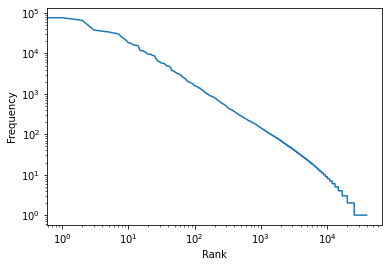

In [72]:
from nltk.corpus import movie_reviews
from collections import Counter
from itertools import chain

# 실제로 한 번 frequency distribution을 봅시다.
# movie review data를 다시 가져와 봅시다.
freq = sorted(Counter(chain(*movie_reviews.sents())).values(), reverse=True)

plt.plot(np.arange(len(freq)), freq)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.xscale("log")
plt.yscale("log");

즉, 대부분의 차원은 거의 쓰이지 않고 큰 의미가 없습니다. 

## 밀집 표현 (Dense Representation)
이러한 희소 표현과 반대되는 표현이 있으니, 이를 밀집 표현(dense representation)이라고 합니다. 밀집 표현은 벡터의 차원을 단어 집합의 크기로 생각하지 않고, 임의로 설정한 숫자의 차원을 사용합니다. 또한 이 과정에서 0과 1의 정수값 (혹은 binary)값이 아닌, 특징(feature)를 나타내는 실수값을 가지게 됩니다. 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춥니다. 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됩니다. 다시 희소 표현의 예를 가져와봅시다.

Ex) Baby = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9995개. 차원은 10,000

예를 들어 10,000개의 단어가 있을 때 Baby란 단어를 표현하기 위해서는 위와 같은 표현을 사용했습니다. 하지만 밀집 표현을 사용하고, 사용자가 밀집 표현의 차원을 128로 설정한다면, 모든 단어의 벡터 표현의 차원은 128로 바뀌면서 모든 값이 실수가 됩니다.

Ex) Baby = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128

이 경우 벡터의 차원이 조밀해졌다고 하여 밀집 벡터(dense vector)라고 부릅니다.

## 워드 임베딩 (Word Embedding)

그럼 이런 밀집 벡터는 어떻게 만들어야 할까요? Sparse vector부터 이런 dense vector를 뽑아내는 방법을 Word embedding이라고 부릅니다. 그리고 이러한 dense vector를 embedded vector (embedding vector)라고 부릅니다. 

Embedding 방법은 한 가지가 아니라 다양합니다. 예를 들면 잠재 의미 분석(Latent Semantic Analysis, LSA), Word2Vec, FastText, GolVe (Global Vectors for Word Representation) 등이 있습니다. BERT, ELMo, GPT-2등의 최신 딥러닝 언어모델도 Embedding에 사용할 수 있습니다. 

| - | 원-핫 벡터 | 임베딩 벡터 |
|-|-|-|
| 차원 | 고차원(단어 집합의 크기) | 저차원 |
| 다른 표현 | 희소 벡터의 일종 | 밀집 벡터의 일종 |
| 표현 방법 | 수동 | 훈련 데이터로부터 학습함 |
| 값의 타입 | 1과 0 | 실수 |

# Word2Vec

One hot vector는 단어 간 유사도를 계산할 수 없는 문제가 있었습니다. 이러한 문제를 개선하여 Word2Vec은 단어간 유사도를 반영하여 단어를 벡터화하는 방법 중 하나입니다. 

http://w.elnn.kr/search/

위 사이트는 한국어 단어에 대해서 벡터 연산을 해볼 수 있는 사이트입니다. 위 사이트에서는 단어들(실제로는 Word2Vec 벡터)로 더하기, 빼기 연산을 할 수 있습니다. 예를 들어 아래의 식에서 좌변을 집어 넣으면, 우변의 답들이 나옵니다.

고양이 + 애교 = 강아지
한국 - 서울 + 도쿄 = 일본
박찬호 - 야구 + 축구 = 호나우두

단어가 가지고 있는 어떤 의미들을 가지고 연산을 하고 있는 것처럼 보입니다.

## 분산 표현 (Distributed Representation)
분산 표현(distributed representation) 방법은 기본적으로 분포 가설(distributional hypothesis)이라는 가정 하에 만들어진 표현 방법입니다. 이 가정은 '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'라는 가정입니다. 위에서 본 확률론적 언어 모형에서 유사한 위치에 놓이는 단어들을 통해서 문장이 성립할 가능성을 보는 것과 유사하다고 생각하셔도 됩니다 (사실은 word2vec 자체가 확률론적 언어모형을 만드려고 하다가 나온 물건입니다). 

예를 들어서 강아지란 단어는 귀엽다, 예쁘다, 애교 등의 단어가 주로 함께 등장하는데 분포 가설에 따라서 저런 내용을 가진 텍스트를 벡터화한다면 저 단어들은 의미적으로 가까운 단어가 됩니다. 분산 표현은 분포 가설을 이용하여 단어들의 셋을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산하여 표현합니다.

이렇게 표현된 벡터들은 원-핫 벡터처럼 벡터의 차원이 단어 집합(vocabulary)의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어듭니다. 예를 들어 단어가 10,000개 있고 인덱스가 1부터 시작한다고 하였을 때 강아지란 단어의 인덱스는 5였다면 강아지란 단어를 표현하는 원-핫 벡터는 다음과 같았습니다.

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]

1이란 값 뒤에는 0이 9,995개가 있는 벡터가 됩니다. 하지만 Word2Vec로 임베딩 된 벡터는 굳이 벡터의 차원이 단어 집합의 크기가 될 필요가 없습니다. 강아지란 단어를 표현하기 위해 사용자가 설정한 차원을 가지는 벡터가 되면서 각 차원은 실수형의 값을 가집니다.

Ex) 강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2]

요약하면 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현합니다. 이런 표현 방법을 사용하면 단어 간 유사도를 계산할 수 있습니다.

최근에는 방법이 단순하고 속도가 빠르며 성능이 좋은 Word2Vec가 많이 쓰이고 있습니다.

## CBOW (Continous Bag of Words)
Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있습니다. CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다. 사실 두 가지의 방법은 크게 다르지 않습니다 (구조상 서로 대칭적인 관계이기도 합니다). 일단 CBOW에 대해 이해해보도록 해 봅시다.

예문 : "The fat cat sat on the mat"
코퍼스에 위와 같은 문장이 있다고 합시다. 가운데 단어를 예측하는 것이 CBOW입니다.. {"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측하는 것은 CBOW가 하는 일입니다. 이 때 예측해야하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)라고 합니다.

중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지 정한 범위를 윈도우(window)라고 합니다. 예를 들어서 윈도우 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat와 cat, 그리고 뒤의 두 단어인 on, the를 참고합니다. 윈도우 크기가 n이라고 한다면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n이 될 것입니다.

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있습니다. 이 방법을 슬라이딩 윈도우(sliding window)라고 부릅니다.

아래 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터 셋을 만드는지 보여줍니다. 또한 Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 하는데, 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줍니다. 위 그림은 결국 CBOW를 위한 전체 데이터 셋을 보여주는 것입니다.

<img src = "./Figs/W12_WORDS.png">

CBOW의 인공 신경망을 간단히 도식화하면 아래와 같습니다. 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 필요합니다. 뒤에서 설명하겠지만, Word2Vec의 학습을 위해서 이 중간 단어의 원-핫 벡터가 필요합니다. 그래서 학습 전에 Vocabulary를 구축하는 작업이 필요합니다.

<img src = "./Figs/W12_CBOW1.png">

Word2Vec은 은닉층이 하나입니다. Deep Learning이 아닌 Shallow Learning입니다. Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 일반적인 은닉층과 구분하기 위해 투사층(projection layer)이라고 부르기도 합니다.

CBOW의 인공 신경망을 좀 더 확대하여, 동작 메커니즘에 대해서 상세하게 알아보도록 하겠습니다. 이 그림에서 주목해야할 것은 두 가지 입니다. 하나는 투사층의 크기가 M이라는 점입니다. CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됩니다. 다시 말해, 위의 그림에서 투사층의 크기는 M=5이기 때문에 CBOW를 수행하고나서 얻는 각 단어의 임베딩 벡터의 차원은 5가 될 것입니다.

<img src = "./Figs/W12_CBOW2.png">

두번째는 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬이라는 점입니다. 여기서 V는 단어 집합의 크기를 의미합니다. 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬이 될 것입니다. 주의할 점은 이 두 행렬은 서로 다른 행렬이라는 점입니다. 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가지게 됩니다. CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조입니다.

<img src = "./Figs/W12_CBOW3.png">

입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱이 어떻게 이루어지는지 보겠습니다. 아래 그림에서는 각 주변 단어의 원-핫 벡터를 x로 표기하였습니다. 입력 벡터는 원-핫 벡터입니다. i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일합니다. 그래서 이 작업을 룩업 테이블(lookup table)이라고 부릅니다. 앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 언급한 적이 있는데, 사실 그 이유가 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문입니다.

<img src = "./Figs/W12_CBOW4.png">

이렇게 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 됩니다. 만약 윈도우 크기가 2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용됩니다. 그렇기 때문에 평균을 구할 때는 4개의 결과 벡터에 대해서 평균을 구하게 됩니다. 투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점이기도 합니다. 뒤에서 보게되겠지만, Skip-Gram은 입력이 중심 단어 하나이기때문에 투사층에서 벡터의 평균을 구하지 않습니다. 그렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해집니다. 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옵니다. 만약 입력 벡터의 차원이 7이었다면 여기서 나오는 벡터도 마찬가지입니다.

<img src = "./Figs/W12_CBOW5.png">

이 벡터에 CBOW는 소프트맥스(softmax) 함수를 취하는데, 소프트맥스 함수로 인한 출력값은 0과 1사이의 실수로, 각 원소의 총 합은 1이 되는 상태로 바뀝니다. 이렇게 나온 벡터를 스코어 벡터(score vector)라고 합니다. 스코어 벡터의 각 차원 안에서의 값이 의미하는 것은 아래와 같습니다.

$\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^z_j}$

스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타냅니다. 그리고 이 스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 합니다. 스코어 벡터를 y^라고 하겠습니다. 중심 단어를 y로 했을 때, 이 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수(loss function)로 아래와 같은 cross-entropy 함수를 사용합니다. 보통 log의 밑은 2를 사용합니다.

$H(\hat y, y) = -\sum_{j=1}^{|V|} y_j log(\hat y_j)$  

그런데 input이 one-hot vector이므로 실제로는 이런 식으로 간소화할 수 있습니다.

$H(\hat y, y) = -y_j log(\hat y_j)$  

이 식이 왜 loss function으로 적합한지 알아보겠습니다. c를 중심 단어에서 1을 가진 차원의 값의 인덱스라고 한다면, 는 $\hat y$ 가 y를 정확하게 예측한 경우가 됩니다. 이를 식에 대입해보면 $-1 log(1) = 0$이 되기 때문에, 결과적으로 y^가 y를 정확하게 예측한 경우의 cross-entropy의 값은 0이 됩니다. 즉, 정확하게 예측하면 더 이상 변화하지 않습니다. 즉, cross entropy를 최소화하는 방향으로 학습해야 합니다.

이제 역전파(Back Propagation)를 수행하면 W와 W'가 학습이 되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 됩니다. 보통은 W를 사용합니다.

## SKIP GRAM

Skip-gram은 CBOW를 이해했다면, 메커니즘 자체는 동일하기 때문에 쉽게 이해할 수 있습니다. 앞서 CBOW에서는 주변 단어를 통해 중심 단어를 예측했다면, Skip-gram은 중심 단어에서 주변 단어를 예측합니다.

앞서 언급한 동일한 예문에 대해서 인공 신경망을 도식화해보면 아래와 같습니다. 이제 중심 단어에 대해서 주변 단어를 예측하기 때문에, 투사층에서 벡터들의 평균을 구하는 과정은 없습니다.

<img src ="Figs/W12_SG.png">

여러 논문에서 성능 비교를 진행했을 때, 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.



## Negative sampling & Hierarchical softmax
위에서 배운 Word2Vec 모델은 계산량때문에 속도 문제가 있습니다. Word2Vec의 마지막 단계에선 출력층에 있는 소프트맥스 함수는 단어 집합 크기의 벡터 내의 모든 값을 0과 1사이의 값으로 만들고, 모두 더하면 1이 되도록 normalize하는 작업을 수행합니다. 그리고 이에 대한 오차를 구하고 모든 단어에 대한 임베딩을 조정합니다. 그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도 마찬가지 입니다. 그런데 만약 단어 집합의 크기가 수백만에 달한다면 이 작업은 굉장히 무거운 작업입니다.

이를 해결하기 위해서 두 가지 방법이 사용됩니다. Negative Sampling과 Hierarchical softmax입니다.

### Negative Sampling
가장 대중적으로 사용되는 모델은 SGNS(Skip-Gram with Negative Sampling)입니다. Skip-gram의 계산량을 줄이기 위해서 네거티브 샘플링(Negative Sampling)을 추가로 사용한다는 겁니다. Skip-gram을 전제로 네거티브 샘플링에 대해서 알아봅시다.

사실 마지막 단계에서 '강아지'와 '고양이'와 같은 단어에 집중하고 있다면, Word2Vec은 사실 '돈가스'나 '컴퓨터'와 같은 연관 관계가 없는수많은 단어의 임베딩을 조정할 필요는 없습니다. 하지만 Normalize하는 작업은 필요하죠. 그래서 이를 전체 단어 집합이 아니라 일부 단어 집합에 대해서만 고려해서 계산량을 줄이는 것을 Negative Sampling이라고 합니다. '강아지', '고양이', '애교'와 같은 주변 단어들을 가져옵니다. 그리고 여기에 '돈가스', '컴퓨터', '회의실'과 같은 랜덤으로 선택된 주변 단어가 아닌 상관없는 단어들을 **일부**만 갖고옵니다. 이렇게 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단계를 이진 분류 문제로 바꿔버리는 겁니다. 즉, Word2Vec은 주변 단어들을 긍정(positive)으로 두고 랜덤으로 샘플링 된 단어들을 부정(negative)으로 둔 다음에 이진 분류 문제를 수행합니다. 즉, 기존의 다중 클래스 분류 문제를 이진 분류 문제로 바꾸면서도 연산량에 있어서 훨씬 효율적입니다.

### Hierarchical Softmax

Negative Sampling은 softmax에서 발생하는 계산을 적은 수의 샘플을 뽑아서 이진분류 문제로 바꾸는 형태로 해결하는 해결책을 썼습니다. Hierarchical Softmax은 이와 달리 binary tree를 사용해서 softmax의 효율을 높이는 형태로 계산량을 줄입니다. 

<img src ="Figs/W12_HSM.png">

V개의 단어는 각각 tree의 leaf node가 됩니다. 이 구조에서는 leaf unit에는 root unit까지 가는 unique path가 존재합니다. 최하단의 하얀 leaf node($w_1 \sim w_V$)는 각각 V개의 단어를 나타내고, 어둡게 칠해진 부분은 특정 단어에 해당하지 않는 일반적인 노드 (unit) 입니다 (V−1개). 굵게 칠해진 path는 단어 $w_2$가 root까지 가는 path를 나타냅니다. 이 path의 길이는 L(w2)=4 입니다. n(w,j)는 root unit에서 단어 w까지 가는 path에 있는 j번째 unit을 나타냅니다. 그리고 각 path는 학습한 corpus에서 특정 길을 택할 확률을 의미합니다. 이 모델에서는 단어들을 위한 output 표현이 없습니. 대신에, 그래프 상의 각각의 노드들은 (root와 leaves는 제외하고) 모델이 학습하고 있는 vector와 연관을 맺고 있습니다. 각 노드가 좌, 우로 내려갈 확률이 모두 다르다면, 특정 단어가 나타날 확률은 모든 경로를 제대로 택해 루트부터 그 단어까지 가는 경로와 같아집니다. 

# Word2Vec Training
이번에는 영어 데이터를 다운로드 받아 직접 Word2Vec 작업을 진행해보도록 하겠습니다. 파이썬에서는 보통 Word2Vec embedding을 하기 위해서 gensim 패키지를 사용합니다. gensim은 사용이 편하고 "아주 빠릅니다"

(사실 제가 gensim의 수 많은 contributor중 하나이기도 합니다.)
<img src = "Figs/gensim_repo.png">

이번에는 영어 데이터를 다운로드 받아 직접 Word2Vec 작업을 진행해보도록 하겠습니다. movie review데이터를 다시 생각해 봅시다.
이번 강의는 Gensim 4.x 버전을 기준으로 진행합니다. 3.x 이전 버전에 비해서 바뀐 점이 많으므로 4.x 버전을 쓰는 것을 추천드립니다.

In [73]:
#! conda install -c conda-forge gensim
#! pip install gensim
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews
from gensim.models import Word2Vec

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\jhyun\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhyun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [74]:
model = Word2Vec(movie_reviews.sents(), vector_size=100, window=5, min_count=1, workers=4, sg=1)

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.
이외에도 다양한 parameter가 있습니다.

* vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
* window = 컨텍스트 윈도우 크기
* min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않습니다)
* workers = 학습을 위한 프로세스 수 (경험적으로 코어가 4개 이상이라도 더 큰수에서 큰 성능 향상이 없었습니다)
* sg = 0은 CBOW, 1은 Skip-gram.

참고로 Word2vec은 파일 혹은 iterable을 입력으로 받을 수 있습니다. 

단어의 벡터는 아래와 같이 조회합니다.

In [75]:
print(model.wv["superman"])

[ 0.2481188   0.3310062   0.03735376  0.0715887   0.01271921 -0.30700922
  0.01965276  0.46785423 -0.2593713  -0.16557762 -0.14651926 -0.4688948
 -0.08956895 -0.00070062  0.0743071   0.0273613  -0.169969   -0.25949162
 -0.03974211 -0.48729664  0.08073597 -0.04014326  0.19722529 -0.14251219
 -0.24904455  0.11968575 -0.2821952   0.07058648 -0.06382328  0.23985791
  0.25267616 -0.24829128  0.13407452 -0.57261246 -0.35073742  0.13298464
  0.19973677 -0.08098923 -0.34015334 -0.29669508  0.10433742  0.02114905
 -0.15704995 -0.02137157  0.10273295 -0.12652712  0.00367402 -0.13017622
 -0.01034012  0.15436566 -0.00703899 -0.17508893  0.07303169 -0.04316275
 -0.31923425 -0.05738971 -0.01062537  0.16855837 -0.19992279  0.16259302
  0.08141874  0.02915025  0.06748584 -0.02367938 -0.04285562  0.2764241
  0.09390661  0.2351274  -0.11913262  0.13334586 -0.06008028  0.4824332
  0.13475522 -0.0314643   0.33392787  0.05955921  0.1489182  -0.01490639
 -0.02690971 -0.17160435 -0.27155712  0.03099184 -0.47

In [76]:
# 기본적으로 Vocab는 frequency로 정렬됩니다.
for i in range(10):
    print(model.wv.index_to_key[i], model.wv.get_vecattr(i, "count"))

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822


In [77]:
# key를 index로 바꾸거나, index를 key로 바꾸려면 아래의 함수를 쓰면 됩니다. 

print(model.wv.index_to_key[2])
print(model.wv.key_to_index["."])

.
2


In [78]:
# punctuations는 이 경우에는 크게 필요가 없을 것 같습니다. 알파벳과 영어만 남겨줍시다.
cleaned_movie_review = [[x for x in y if x.isalnum()] for y in movie_reviews.sents()]
model = Word2Vec(cleaned_movie_review, vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [79]:
# 모델은 아래와 같이 저장하고 불러올 수 있습니다.
model.save("./tempmodel.model")
model = Word2Vec.load("./tempmodel.model")

In [80]:
# 새 모델을 봅시다
for i in range(10):
    print(model.wv.index_to_key[i], model.wv.get_vecattr(i, "count"))

the 76529
a 38106
and 35576
of 34123
to 31937
is 25195
in 21822
s 18513
it 16107
that 15924


In [81]:
model.wv.most_similar("batman")

[('superman', 0.7994018197059631),
 ('forever', 0.7721414566040039),
 ('iii', 0.7700611352920532),
 ('1994', 0.7696229815483093),
 ('fargo', 0.768038809299469),
 ('crow', 0.760101854801178),
 ('robin', 0.7548124194145203),
 ('welcome', 0.753488302230835),
 ('grisham', 0.7529343366622925),
 ('chan', 0.744905412197113)]

## Word2Vec 시각화

Word2Vec의 결과를 시각화해 봅시다. PCA와 t-SNE등의 차원 축소 방법들을 통해 고차원 데이터를 2차원 평면에 나타낼 수 있습니다.

### Principal component analysis (PCA)

PCA(주성분 분석)은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전한 basis를 찾는 방법입니다. 이러한 basis를 principal component라고 하고, 특성들의 상관관계가 가장 큰 방향(분산이 가장 큰 방향)을 찾고 그 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾아냅니다. PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있습니다.

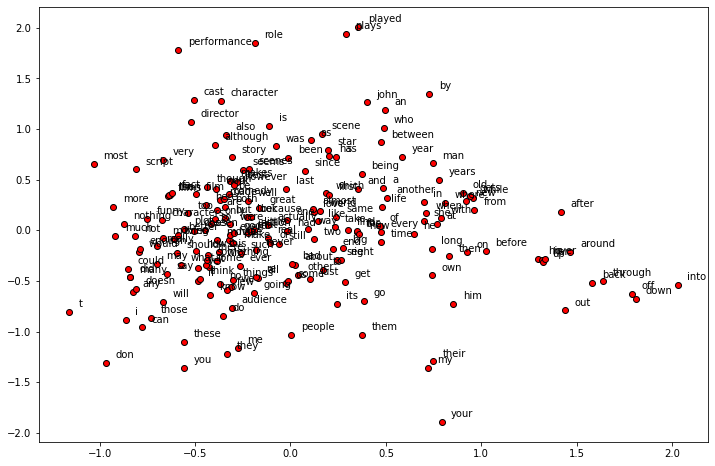

In [82]:
# 너무 많으니 처음 200개만
from sklearn.decomposition import PCA
import matplotlib as mpl
from matplotlib import pyplot as plt

num_words = 200
words = [x for x in model.wv.index_to_key[:num_words]]
vectors = [model.wv[x] for x in range(num_words)]
pca = PCA(n_components=2)
pca.fit(vectors)
x_pca = pca.transform(vectors)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, x_pca):
    plt.text(x+0.05, y+0.05, word)

### T-SNE
PCA는 쉽게 차원축소가 가능하지만, 데이터의 많은 정보가 유실이 됩니다. 매니폴드 학습 알고리즘이라고 하는 시각화 알고리즘들은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 할 수 있습니다. T-SNE 알고리즘을 흔히 씁니다. t-SNE의 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것입니다. 먼저 각 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 만듭니다. 이 과정에서 Student's t 분포를 사용하므로 t-sne라고 부릅니다.

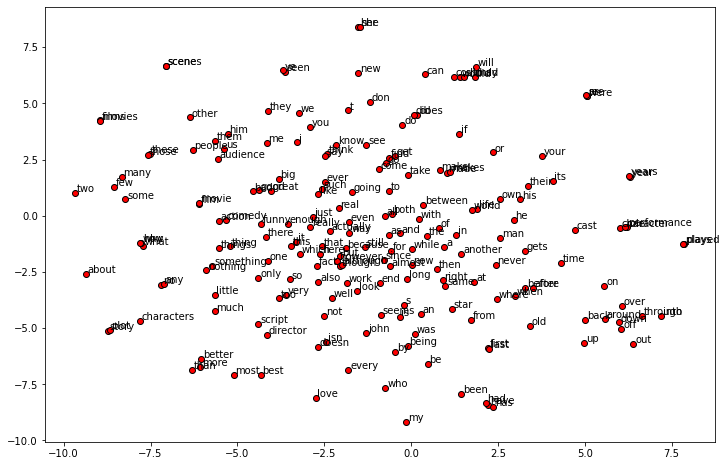

In [84]:
# 너무 많으니 처음 200개만
from sklearn.manifold import TSNE
import matplotlib as mpl
from matplotlib import pyplot as plt

num_words = 200
words = [x for x in model.wv.index_to_key[:num_words]]
vectors = [model.wv[x] for x in range(num_words)]
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(vectors)
plt.figure(figsize=(12,8))
plt.scatter(x_tsne[:,0], x_tsne[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, x_tsne):
    plt.text(x+0.05, y+0.05, word)